In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("WESAD_Original.csv")

In [3]:
data

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,id,labels
0,55.0,-32.0,44.0,30.52,1.634132,35.81,2,0.0
1,49.0,-21.0,30.0,52.54,1.614912,35.81,2,0.0
2,52.0,-22.0,27.0,94.31,1.591848,35.81,2,0.0
3,58.0,-14.0,28.0,-38.86,1.558534,35.81,2,0.0
4,52.0,-22.0,27.0,94.31,1.591848,35.81,2,0.0
...,...,...,...,...,...,...,...,...
315059,-43.0,6.0,47.0,-17.38,0.858816,32.23,17,0.0
315060,-43.0,6.0,47.0,5.51,0.858816,32.21,17,0.0
315061,-43.0,6.0,47.0,-17.38,0.858816,32.23,17,0.0
315062,-43.0,6.0,47.0,8.78,0.860096,32.23,17,0.0


In [4]:
label = data['labels']
id = data['id']

In [5]:
#data = data.drop(columns=['labels'])
data = data.drop(columns=['id'])

In [6]:
data

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.0,-32.0,44.0,30.52,1.634132,35.81,0.0
1,49.0,-21.0,30.0,52.54,1.614912,35.81,0.0
2,52.0,-22.0,27.0,94.31,1.591848,35.81,0.0
3,58.0,-14.0,28.0,-38.86,1.558534,35.81,0.0
4,52.0,-22.0,27.0,94.31,1.591848,35.81,0.0
...,...,...,...,...,...,...,...
315059,-43.0,6.0,47.0,-17.38,0.858816,32.23,0.0
315060,-43.0,6.0,47.0,5.51,0.858816,32.21,0.0
315061,-43.0,6.0,47.0,-17.38,0.858816,32.23,0.0
315062,-43.0,6.0,47.0,8.78,0.860096,32.23,0.0


In [7]:
print("Základné infromácie")
print(data.info())

Základné infromácie
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315064 entries, 0 to 315063
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ACC_0   315064 non-null  float64
 1   ACC_1   315064 non-null  float64
 2   ACC_2   315064 non-null  float64
 3   BVP     315064 non-null  float64
 4   EDA     315064 non-null  float64
 5   TEMP    315064 non-null  float64
 6   labels  315064 non-null  float64
dtypes: float64(7)
memory usage: 16.8 MB
None


In [8]:
print("\nštatistika:")
print(data.describe())


štatistika:
               ACC_0          ACC_1          ACC_2            BVP  \
count  315064.000000  315064.000000  315064.000000  315064.000000   
mean       15.146285      -4.023624      11.186295       0.010333   
std        45.873747      26.587797      29.735746      58.212438   
min      -128.000000     -90.000000    -128.000000   -1597.730000   
25%       -33.000000     -21.000000      -8.000000     -14.010000   
50%        35.000000      -4.000000      13.000000       2.260000   
75%        56.000000      10.000000      35.000000      15.410000   
max       127.000000     114.000000     127.000000    1409.940000   

                 EDA           TEMP         labels  
count  315064.000000  315064.000000  315064.000000  
mean        1.877177      32.767322       0.177135  
std         2.528897       1.549290       0.381784  
min         0.074584      28.990000       0.000000  
25%         0.312404      31.730000       0.000000  
50%         0.798588      32.970000       0.000

In [9]:
print("\nTest na chýbajúce hodnoty:")
print(data.isnull().sum())


Test na chýbajúce hodnoty:
ACC_0     0
ACC_1     0
ACC_2     0
BVP       0
EDA       0
TEMP      0
labels    0
dtype: int64


In [10]:
duplicate_rows = data.duplicated()
print("\nDuplikátne hodnoty:", duplicate_rows.sum())


Duplikátne hodnoty: 157421



Vizualizácia rozdelenia:


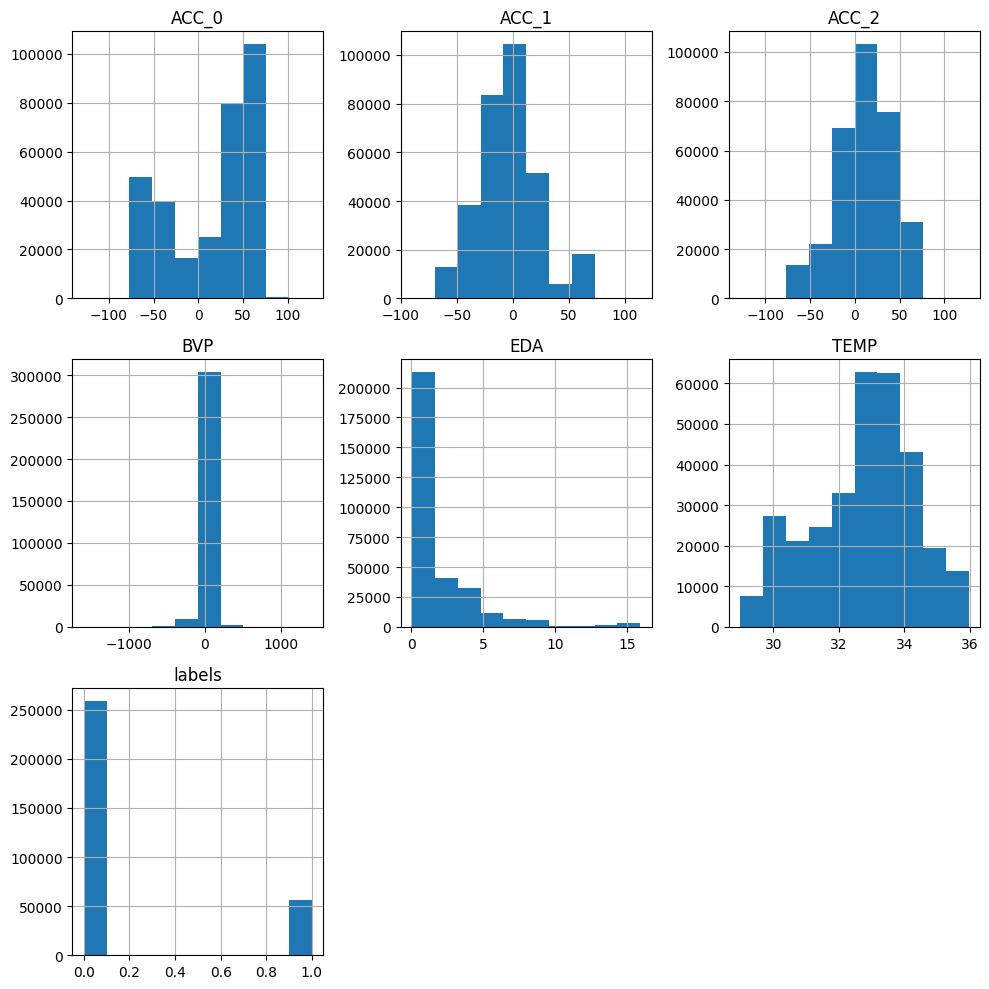

In [11]:
print("\nVizualizácia rozdelenia:")
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()


Outliers:


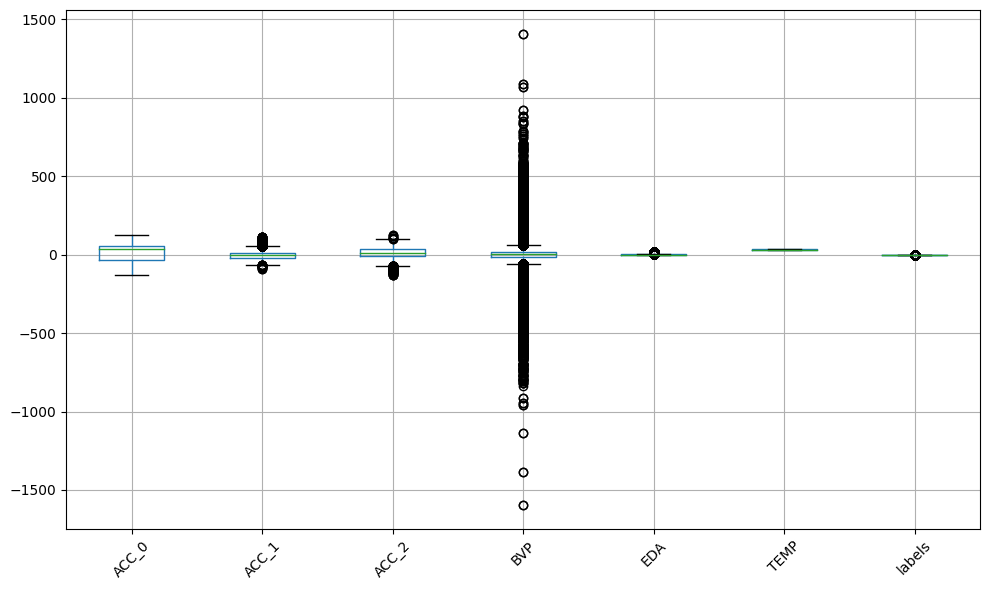

In [12]:
print("\nOutliers:")
data.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Korelácia:


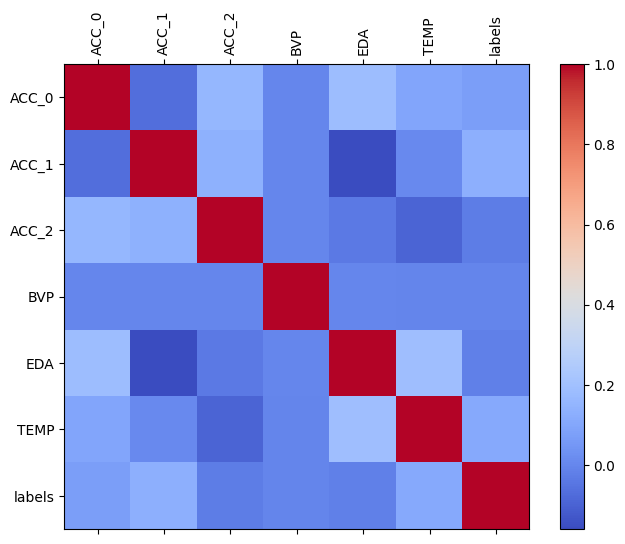

In [13]:
print("\nKorelácia:")
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()

Undersample

In [14]:
data

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.0,-32.0,44.0,30.52,1.634132,35.81,0.0
1,49.0,-21.0,30.0,52.54,1.614912,35.81,0.0
2,52.0,-22.0,27.0,94.31,1.591848,35.81,0.0
3,58.0,-14.0,28.0,-38.86,1.558534,35.81,0.0
4,52.0,-22.0,27.0,94.31,1.591848,35.81,0.0
...,...,...,...,...,...,...,...
315059,-43.0,6.0,47.0,-17.38,0.858816,32.23,0.0
315060,-43.0,6.0,47.0,5.51,0.858816,32.21,0.0
315061,-43.0,6.0,47.0,-17.38,0.858816,32.23,0.0
315062,-43.0,6.0,47.0,8.78,0.860096,32.23,0.0


In [15]:
X = data.drop(columns=['labels'])
y = data['labels']

In [16]:
y.value_counts()

labels
0.0    259255
1.0     55809
Name: count, dtype: int64

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

In [19]:
y_resampled.value_counts()

labels
0.0    55809
1.0    55809
Name: count, dtype: int64

In [20]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [21]:
data_resampled.describe()

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
count,111618.000000,111618.00000,111618.000000,111618.000000,111618.000000,111618.000000,111618.000000
mean,17.928291,-1.08866,10.531402,-0.275678,1.848955,32.908171,0.500000
std,45.442855,27.12679,28.906306,57.469437,2.275945,1.511197,0.500002
min,-123.000000,-90.00000,-128.000000,-1136.010000,0.074584,28.990000,0.000000
25%,-30.000000,-17.00000,-7.000000,-13.960000,0.365424,32.030000,0.000000
50%,38.000000,0.00000,12.000000,1.880000,0.904712,32.990000,0.500000
75%,57.000000,12.00000,31.000000,15.350000,2.789867,33.910000,1.000000
max,127.000000,114.00000,127.000000,1409.940000,15.907402,35.970000,1.000000


In [22]:
duplicate_rows = data_resampled.duplicated()
print("\nDuplikátne hodnoty:", duplicate_rows.sum())


Duplikátne hodnoty: 33846



Vizualizácia rozdelenia:


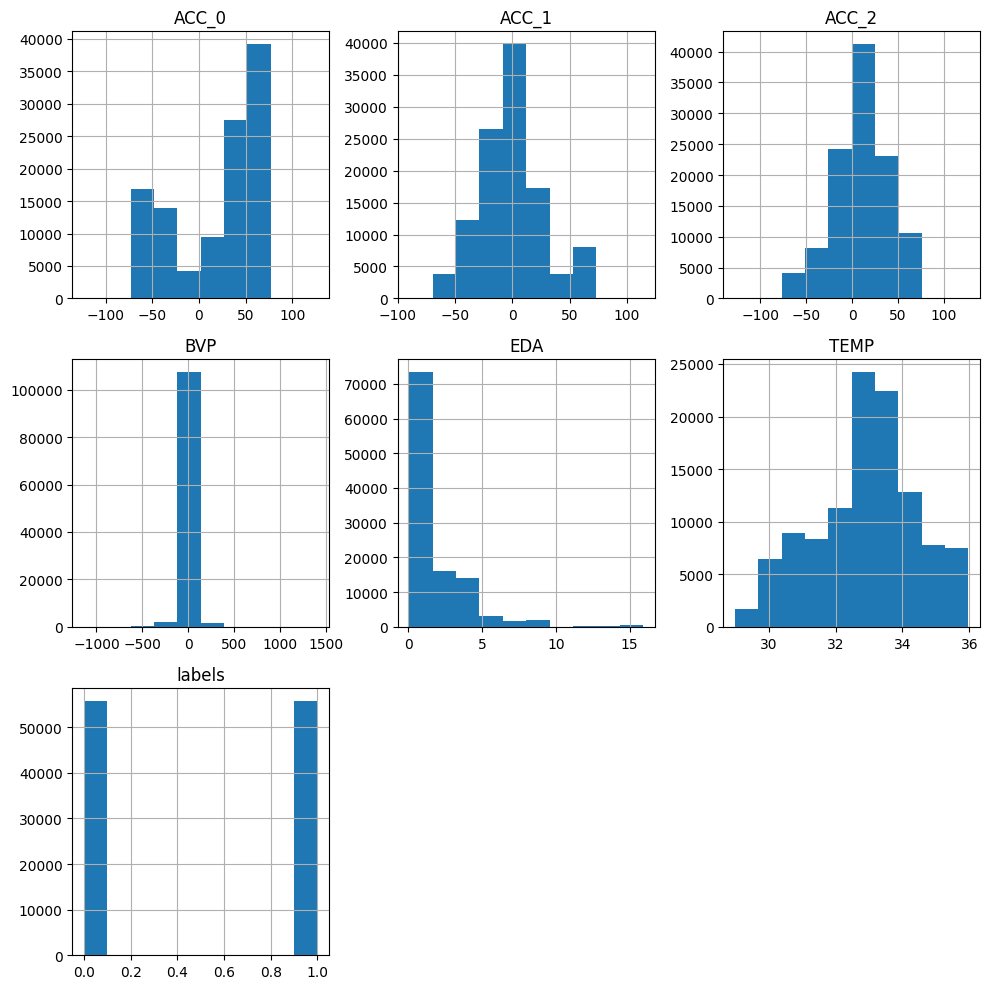

In [23]:
print("\nVizualizácia rozdelenia:")
data_resampled.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()


Outliers:


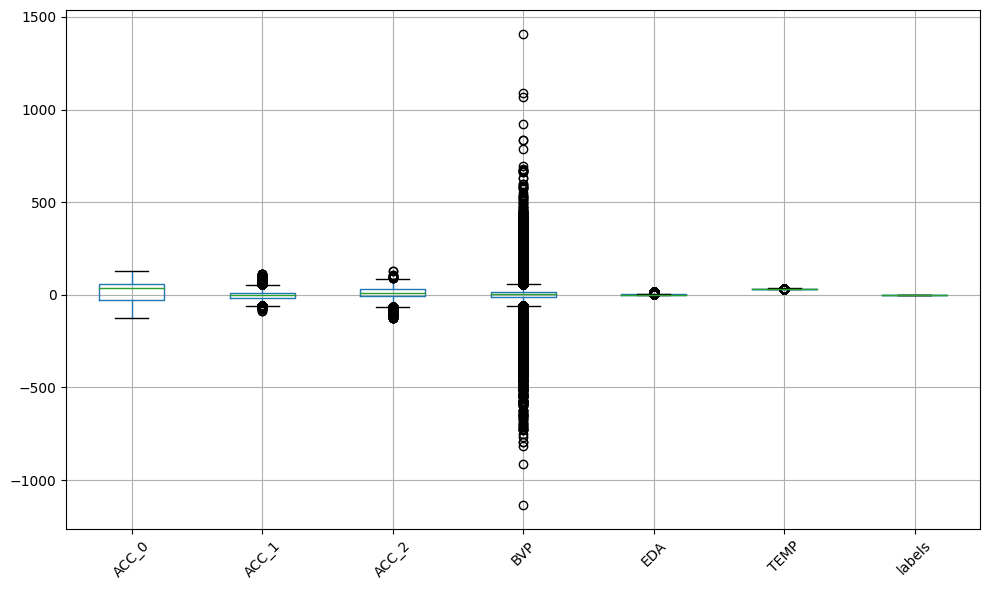

In [24]:
print("\nOutliers:")
data_resampled.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Korelácia:


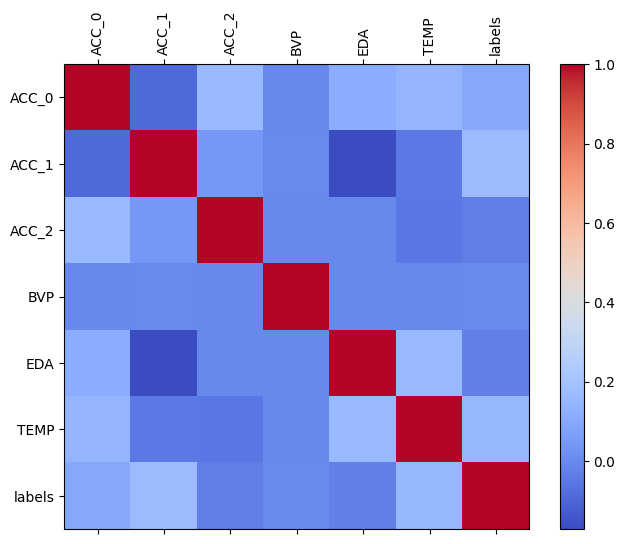

In [25]:
print("\nKorelácia:")
correlation_matrix = data_resampled.corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(data_resampled.columns)), data_resampled.columns, rotation=90)
plt.yticks(range(len(data_resampled.columns)), data_resampled.columns)
plt.show()

In [26]:
data_resampled.to_csv('WESAD_Undersample.csv', index=False)

In [27]:
data

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.0,-32.0,44.0,30.52,1.634132,35.81,0.0
1,49.0,-21.0,30.0,52.54,1.614912,35.81,0.0
2,52.0,-22.0,27.0,94.31,1.591848,35.81,0.0
3,58.0,-14.0,28.0,-38.86,1.558534,35.81,0.0
4,52.0,-22.0,27.0,94.31,1.591848,35.81,0.0
...,...,...,...,...,...,...,...
315059,-43.0,6.0,47.0,-17.38,0.858816,32.23,0.0
315060,-43.0,6.0,47.0,5.51,0.858816,32.21,0.0
315061,-43.0,6.0,47.0,-17.38,0.858816,32.23,0.0
315062,-43.0,6.0,47.0,8.78,0.860096,32.23,0.0


Oversample

In [28]:
y.value_counts()

labels
0.0    259255
1.0     55809
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [31]:
y_resampled.shape

(518510,)

In [32]:
y_resampled.value_counts()

labels
0.0    259255
1.0    259255
Name: count, dtype: int64

In [33]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [34]:
data_resampled.describe()

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
count,518510.000000,518510.000000,518510.000000,518510.000000,518510.000000,518510.000000,518510.0
mean,17.912889,-1.043174,10.571623,-0.067416,1.835625,32.911930,0.5
std,45.450457,27.053836,28.856693,57.434381,2.248767,1.510312,0.5
min,-128.000000,-90.000000,-128.000000,-1597.730000,0.074584,28.990000,0.0
25%,-31.000000,-17.000000,-7.000000,-13.850000,0.367987,32.030000,0.0
50%,38.000000,0.000000,12.000000,1.950000,0.908042,33.000000,0.5
75%,57.000000,12.281800,31.000000,15.419732,2.750613,33.919014,1.0
max,127.000000,114.000000,127.000000,1409.940000,15.921474,35.970000,1.0


In [35]:
data_resampled

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,55.000000,-32.000000,44.000000,30.520000,1.634132,35.810000,0.0
1,49.000000,-21.000000,30.000000,52.540000,1.614912,35.810000,0.0
2,52.000000,-22.000000,27.000000,94.310000,1.591848,35.810000,0.0
3,58.000000,-14.000000,28.000000,-38.860000,1.558534,35.810000,0.0
4,52.000000,-22.000000,27.000000,94.310000,1.591848,35.810000,0.0
...,...,...,...,...,...,...,...
518505,60.987584,-12.000000,-8.000000,15.799503,0.944752,33.498469,1.0
518506,-55.000000,-7.000000,33.000000,-1.168678,4.171446,32.660000,1.0
518507,61.000000,17.304812,-2.695188,-1.607487,0.771039,35.089038,1.0
518508,58.931428,-4.534286,20.602858,6.070771,0.986309,32.734914,1.0


In [36]:
duplicate_rows = data_resampled.duplicated()
print("\nDuplikátne hodnoty:", duplicate_rows.sum())


Duplikátne hodnoty: 197986



Vizualizácia rozdelenia:


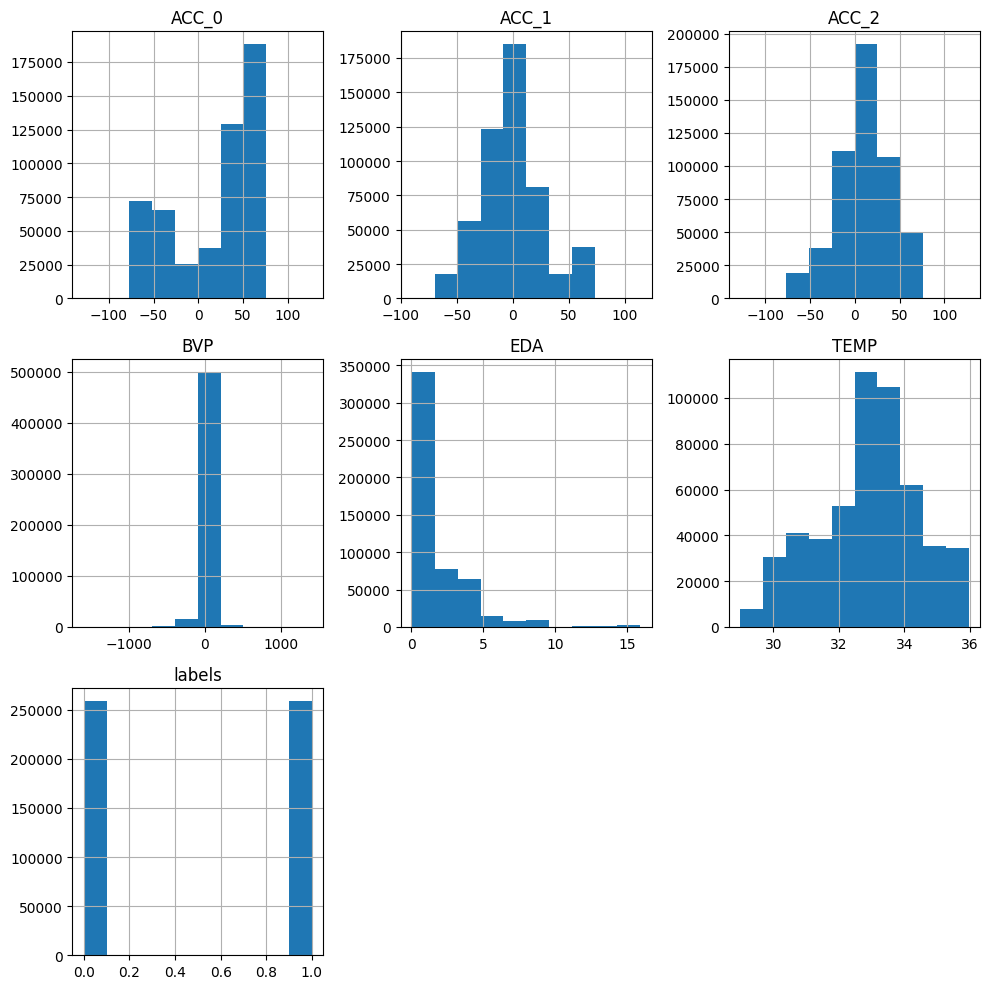

In [37]:
print("\nVizualizácia rozdelenia:")
data_resampled.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()


Outliers:


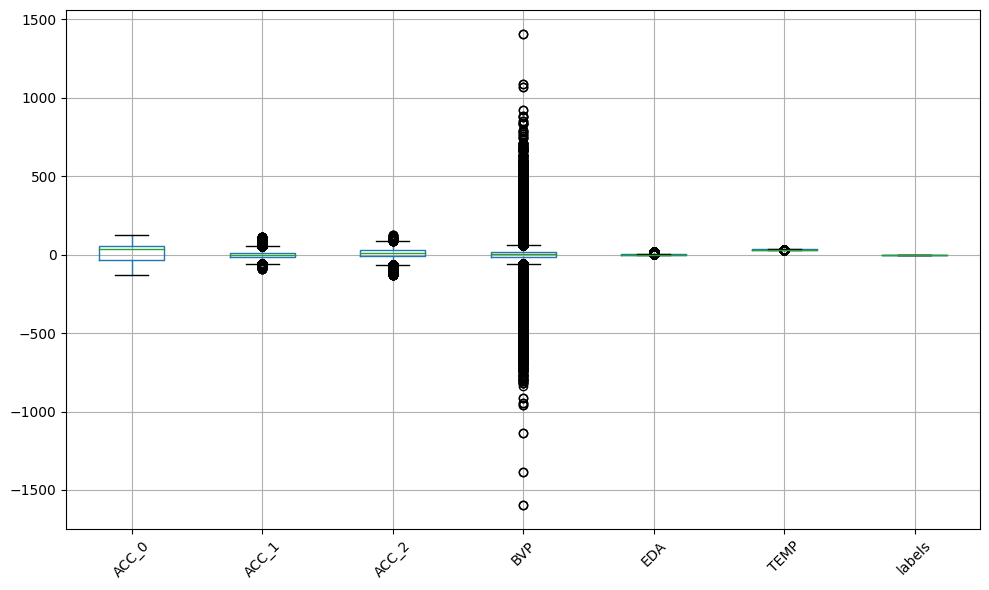

In [38]:
print("\nOutliers:")
data_resampled.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Korelácia:


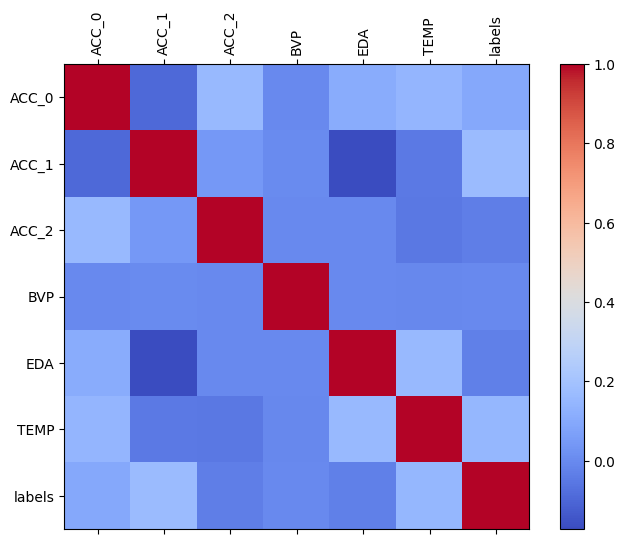

In [39]:
print("\nKorelácia:")
correlation_matrix = data_resampled.corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(data_resampled.columns)), data_resampled.columns, rotation=90)
plt.yticks(range(len(data_resampled.columns)), data_resampled.columns)
plt.show()

In [40]:
data_resampled.to_csv('WESAD_Oversample.csv', index=False)